<a href="https://colab.research.google.com/github/zeeshanibrarali/Analyse-the-Popularity-of-Programming-Languages-over-Time/blob/main/Programming_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:

df = pd.read_csv("/content/QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.tail()

,DATE,TAG,POSTS
2575,2024-01-01 00:00:00,php,1602
2576,2024-01-01 00:00:00,python,8506
2577,2024-01-01 00:00:00,r,1875
2578,2024-01-01 00:00:00,ruby,168
2579,2024-01-01 00:00:00,swift,944


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2580, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

DATE     2580
TAG      2580
POSTS    2580
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
total_number = df.groupby("TAG").sum()
sorted_values = total_number.sort_values(by="POSTS", ascending=True)
sorted_values

<ipython-input-32-8b56dd364dde>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_number = df.groupby("TAG").sum()


,POSTS
TAG,
assembly,43948
delphi,51654
perl,68026
go,72190
ruby,228827
swift,332318
c,402492
r,502629
c++,804054


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
last_back = df.groupby("TAG").count()
last_back

,DATE,POSTS
TAG,,
assembly,186,186
c,186,186
c#,187,187
c++,186,186
delphi,186,186
go,171,171
java,186,186
javascript,186,186
perl,186,186


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
type(df["DATE"][1])

str

In [ ]:
type(pd.to_datetime(df["DATE"][1]))

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.DATE = pd.to_datetime(df.DATE)
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,504
4,2008-08-01,c++,164
...,...,...,...
2575,2024-01-01,php,1602
2576,2024-01-01,python,8506
2577,2024-01-01,r,1875
2578,2024-01-01,ruby,168


## Data Manipulation



In [ ]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS" )
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,157.0,872.0,3049.0,1491.0,105.0,424.0,3328.0,5700.0,61.0,1664.0,8622.0,2038.0,191.0,861.0
2023-10-01,175.0,975.0,3198.0,1721.0,165.0,422.0,3445.0,5496.0,53.0,1547.0,9047.0,2067.0,196.0,905.0
2023-11-01,173.0,960.0,3119.0,1471.0,103.0,411.0,3299.0,5222.0,44.0,1405.0,8510.0,1999.0,157.0,873.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.shape

(187, 14)

In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [ ]:
reshaped_df.count()

TAG
assembly      186
c             186
c#            187
c++           186
delphi        186
go            171
java          186
javascript    186
perl          186
php           186
python        186
r             184
ruby          186
swift         178
dtype: int64

In [ ]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,608.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,157.0,0.0


In [ ]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

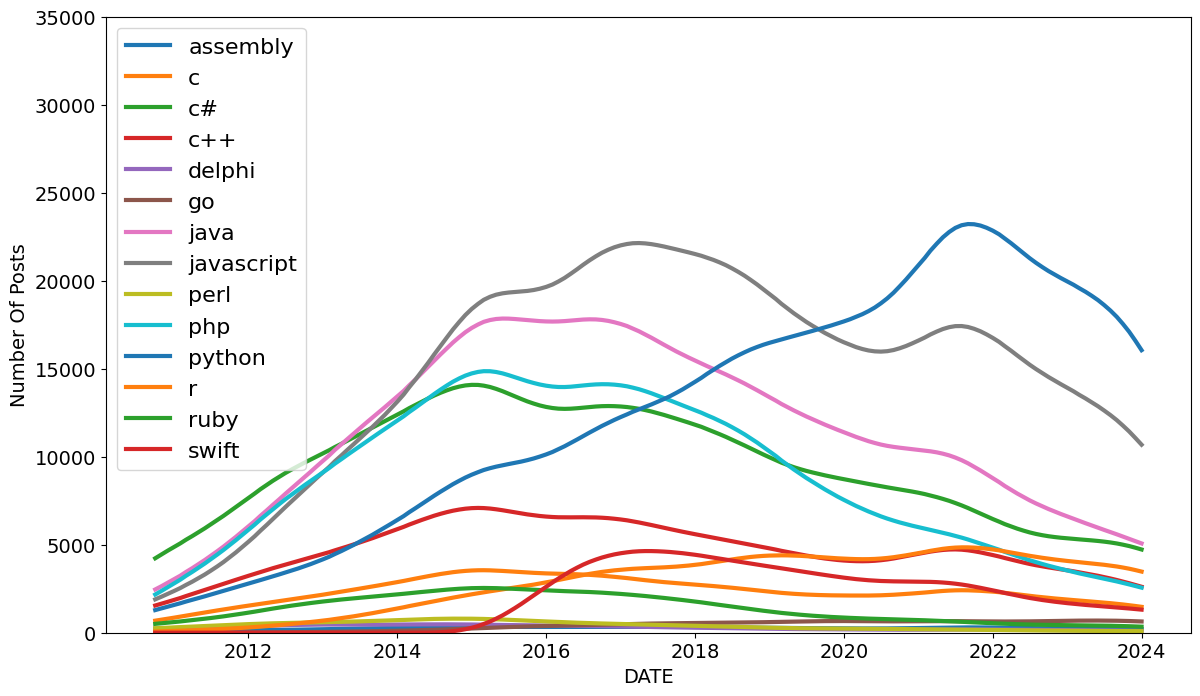

In [ ]:
reshaped_df = reshaped_df.rolling(window=12).mean()
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("Number Of Posts", fontsize=14)
plt.ylim(0,35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01'],
              dtype='datetime64[ns]', name='DATE', length=187, freq=None)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).